# Consuming data using Kafka

## 2.2 Memory Event Consumer 

<IPython.core.display.Javascript object>


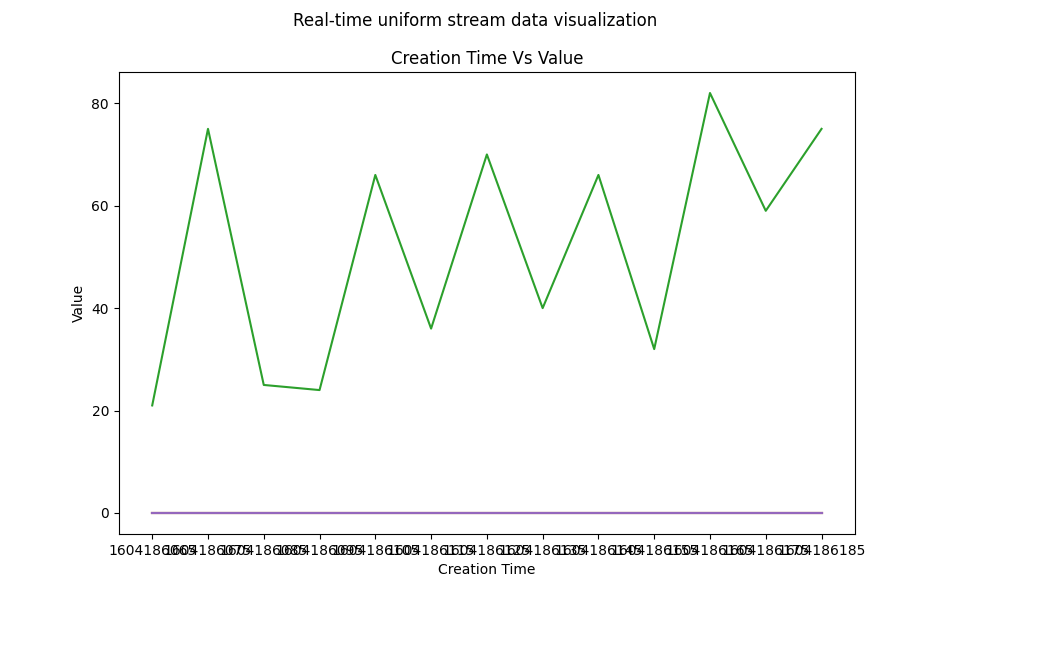

Waiting for messages


KeyboardInterrupt: 

In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
from collections import Counter

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

# subscribe to producer topic
topic = 'Memory_Stream'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))


    
def consume_messages(consumer, fig, ax1):
    try:
        # container for x and y values
        x, y1, y2, y3, y4, y5 = [],[],[],[],[],[]
        
        # while loop to continuously consume all the messages in the batch
        while True:
            for message in consumer:
                if len(message.value) > 0 : 
                    y = []
                    
                    # get the initial timestamp value
                    # as it will be the 'ts' value for 
                    # the whole message
                    x.append(message.value[0]['ts']) 
                    

                    # extract the machine ids
                    for data in message.value:  
                        y.append(data['machine'])

                    # use Counter() function to get the 
                    # list element counts to add to respective lists
                    m = Counter(y)
                    y1.append(m['4'])
                    y2.append(m['5'])
                    y3.append(m['6'])
                    y4.append(m['7'])
                    y5.append(m['8'])

                    # condition to check if the new timestamp is old
                    # or new, then add the counts of the machines
                    if (len(x) > 1) :
                        if (x[-1] == x[-2]):                   
                            y1[-1] += y1[-2]
                            y2[-1] += y2[-2]
                            y3[-1] += y3[-2]
                            y4[-1] += y4[-2]
                            y5[-1] += y5[-2]
                            x.pop(-2)
                            y1.pop(-2)
                            y2.pop(-2)
                            y3.pop(-2)
                            y4.pop(-2)
                            y5.pop(-2)
                        
                  
                    # start plotting when time difference is 2 minutes
                    if (int(x[-1]) - int(x[0])) == 120:
                        ax1.clear()
                        ax1.plot(x, y1)
                        ax1.plot(x, y2)
                        ax1.plot(x, y3)
                        ax1.plot(x, y4)
                        ax1.plot(x, y5)
                        ax1.set_xlabel('Creation Time')
                        ax1.set_ylabel('Value')
                        ax1.set_title('Creation Time Vs Value')
                        fig.canvas.draw()
                        x.pop(0) # removing the item in the first position
                        y1.pop(0)
                        y2.pop(0)
                        y3.pop(0)
                        y4.pop(0)
                        y5.pop(0)

        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    print('Waiting for messages')
    consume_messages(consumer,fig, ax) 
           
   
           